# Assignment - Data Anonymization

#### MSc in Business Analytics PT 2021-2022, Department of Management Science and Technology, AUEB
* Konstantinos Alamanis - p2822103 <br />
* Vasileiou Giorgos - p2822106 <br />

### Exercise A

#### 1. Which attributes can act as quasi-identifiers and why? <br >

In the specific case, as quasi-identifiers can act the fields such as demographic information such as age, gender, race, and occupation as if they can combined together they could lead to the identification of a specific person.

#### 2. Which of the following properties holds for the data? <br > Explain the key differences between the three approaches with respect to GDPR.
            a. They are anonymized 
            b. They are pseudonymized
            c. They are encrypted

They are anonymized and pseudonymized. <br >

Pseudonymization involves replacing direct identifiers, such as names or addresses, with pseudonyms or codes. Pseudonymized data remains personal data under the GDPR, as it can still be linked back to an individual using the pseudonym or code. However, if the pseudonym or code is kept separately and securely, and the data is processed in a way that ensures the pseudonym or code cannot be linked back to an individual, then the GDPR requirements are reduced. For example, the data can be processed for research purposes without obtaining individual consent. <br > 

Anonymization involves removing all information that could potentially identify an individual from a dataset, making it impossible to re-identify individuals from the data. Anonymized data is outside the scope of the GDPR, as it is no longer considered personal data. Therefore, the data can be freely used and shared without the need for individual consent or compliance with GDPR requirements. <br >

Encryption involves encoding data in a way that can only be decrypted with a key or password. Encrypted data remains personal data under the GDPR, as it can be decrypted to reveal the original information. However, if the key or password is kept separately and securely, and the data is processed in a way that ensures the key or password cannot be linked back to an individual, then the GDPR requirements are reduced. For example, encrypted data can be processed for research purposes without obtaining individual consent.


#### 3. Explain how a person can be identified. 

Quasi-identifiers such as age, gender, race, and occupation can be used in combination to re-identify individuals in a dataset, even if the dataset has been anonymized or pseudonymized.
For example, let's say a dataset contains information about individuals' ages, genders, races, and occupations. Even if the dataset does not include any direct identifiers such as names or addresses, an attacker may be able to re-identify individuals by using external data sources or by combining the quasi-identifiers in a way that is unique to each individual. Here are some examples of how this could happen:
* Unique combinations: Even if age, gender, race, and occupation are not unique identifiers individually, a unique combination of these factors could be used to identify a specific individual. For example, if the dataset contains only one female Hispanic accountant in a certain age range, an attacker could use this combination of quasi-identifiers to re-identify that individual.
* External data sources: An attacker may be able to combine the quasi-identifiers with external data sources to re-identify individuals. For example, if an attacker knows the age, gender, race, and occupation of a celebrity, they may be able to use this information to re-identify individuals in the dataset who share similar characteristics.
* Inference attacks: An attacker may be able to use statistical analysis to infer information about individuals in the dataset based on the quasi-identifiers. For example, if the dataset contains information about the average income for each occupation, an attacker may be able to infer the income of individuals in the dataset based on their occupation, age, and gender.


#### 4. Define differential privacy and explain the importance of the privacy parameter e. <br >

Differential privacy is a concept in data privacy that aims to protect the privacy of individuals while allowing for the analysis and utilization of large datasets. It provides a formal framework for quantifying the privacy risk associated with releasing data and for designing mechanisms to limit the disclosure of sensitive information. The main idea behind differential privacy is to introduce randomness into the data before it is released so that the statistical properties of the data remain largely unchanged while individual records are protected.  <br >

This randomness is controlled by a privacy parameter called epsilon (ε), which determines the strength of the privacy guarantee. A smaller epsilon value indicates more vital privacy protection, but also higher noise in the data, which may reduce the accuracy of the analysis. Conversely, a larger epsilon value may allow for more accurate analysis, but with a higher risk of re-identification. The importance of the privacy parameter e lies in striking a balance between privacy and utility. A lower epsilon value provides more robust privacy protection by making it more difficult to re-identify individuals in the released data. However, a lower epsilon also results in more noise being added to the data, which can reduce the utility of the data for certain types of analysis. A higher epsilon value allows for more accurate analysis but may compromise privacy to a greater extent. <br >

Therefore, it is important to carefully choose the epsilon value based on the sensitivity of the data, the intended use of the data, and the acceptable level of privacy risk. Differential privacy provides a formal framework for making these trade-offs, and it has become an important tool for protecting the privacy of individuals in the era of big data.


### Exercise B

In [2]:
# required libaries
import pandas as pd
from PIL import Image as img
import warnings
warnings.filterwarnings('ignore')

#### Load the dataset and display the first few rows to understand the data.

In [3]:
# loading the data
df = pd.read_table(r"data/de.2010.pums.01.txt", header = None)
df

,0
0,H000000110350010100000064807579000000592814200...
1,H000000210350010100000064807579000000592814205...
2,H000000310350010100000064807579000000592814201...
3,P000000301010170001005602010110000000101001020...
4,H000000410350010100000064807579000000592814201...
...,...
132948,H004302810350030000003098637571000024244328717...
132949,P004302801010010001002902010110000000101001000...
132950,P004302802010130002002402010110000000101001000...
132951,P004302803010140002002303010110000000101001000...


In [4]:
# keeping rows that contains person data only
df['p/h'] = df[0].str[0]
df_p = df[df['p/h']=='P']
df_p.head()

,0,p/h
3,P000000301010170001005602010110000000101001020...,P
5,P000000401010010002005601010101000000202002000...,P
6,P000000402010030002001901010101000000202002000...,P
7,P000000403010030001001801010101000000202002000...,P
8,P000000404010030112001702010101000000202002000...,P


In [5]:
# loading information for mapping the dataframe
df_index = pd.read_excel(r"data/2010 PUMS Record Layout.xlsx", skiprows = 1, sheet_name = "Person")
df_index2 = df_index[['BEG', 'END', 'VARIABLE']].copy()
df_index3 = df_index2.drop_duplicates('VARIABLE').copy()
df_index_final = df_index3.dropna()
df_index_final['BEG'] = df_index_final['BEG'].astype(int)
df_index_final['END'] = df_index_final['END'].astype(int)
df_index_final.reset_index(drop=True, inplace=True)

In [6]:
# index to use to split primary column based on values order
df_index_final2 = df_index_final.copy()
df_index_final2['BEG'] = df_index_final['BEG'].apply(lambda x: x-1)
df_index_final2

,BEG,END,VARIABLE
0,0,1,RECTYPE
1,1,8,SERIALNO
2,8,10,PNUM
3,10,11,PSUB
4,11,13,PWEIGHT
5,13,15,RELATE
6,15,16,RELATEA
7,16,17,OC
8,17,18,RC
9,18,19,SEX


In [7]:
# for loop to expand columns
for i in range(0, len(df_index_final2)):
    
    name = df_index_final2.iloc[i, 2]
    
    df_p[name] = df_p[0].str[df_index_final2.iloc[i, 0] : df_index_final2.iloc[i, 1]]
            

In [8]:
# expanded dataframe to be used in AMNESIA
df_p_final = df_p.iloc[:, 2:].copy()
df_p_final.reset_index(drop=True, inplace=True)
df_p_final

,RECTYPE,SERIALNO,PNUM,PSUB,PWEIGHT,RELATE,RELATEA,OC,RC,SEX,...,NHAW,OPI,OTHER,RACESHORT,RACEDET,RACECHKBX,RACEA,GQTYP,GQTYPA,PADDING
0,P,0000003,01,0,10,17,0,0,0,1,...,0,0,0,01,01,001,0,2,0,
1,P,0000004,01,0,10,01,0,0,0,2,...,0,0,0,02,02,002,0,0,0,
2,P,0000004,02,0,10,03,0,0,0,2,...,0,0,0,02,02,002,0,0,0,
3,P,0000004,03,0,10,03,0,0,0,1,...,0,0,0,02,02,002,0,0,0,
4,P,0000004,04,0,10,03,0,1,1,2,...,0,0,0,02,02,002,0,0,0,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89919,P,0043027,02,0,10,02,0,0,0,2,...,0,0,0,01,01,001,0,0,0,
89920,P,0043027,03,0,10,03,0,1,1,2,...,0,0,0,01,01,001,0,0,0,
89921,P,0043028,01,0,10,01,0,0,0,1,...,0,0,0,01,01,001,0,0,0,
89922,P,0043028,02,0,10,13,0,0,0,2,...,0,0,0,01,01,001,0,0,0,


In [9]:
df_p_final.to_csv(r"output/df_cleaned.csv", sep = ";")

#### 1. Use the Amnesia anonymization tool to apply k-anonymity to the dataset. Comment on the resulting dataset.

* Step 1: Load data in AMNESIA and map data types.

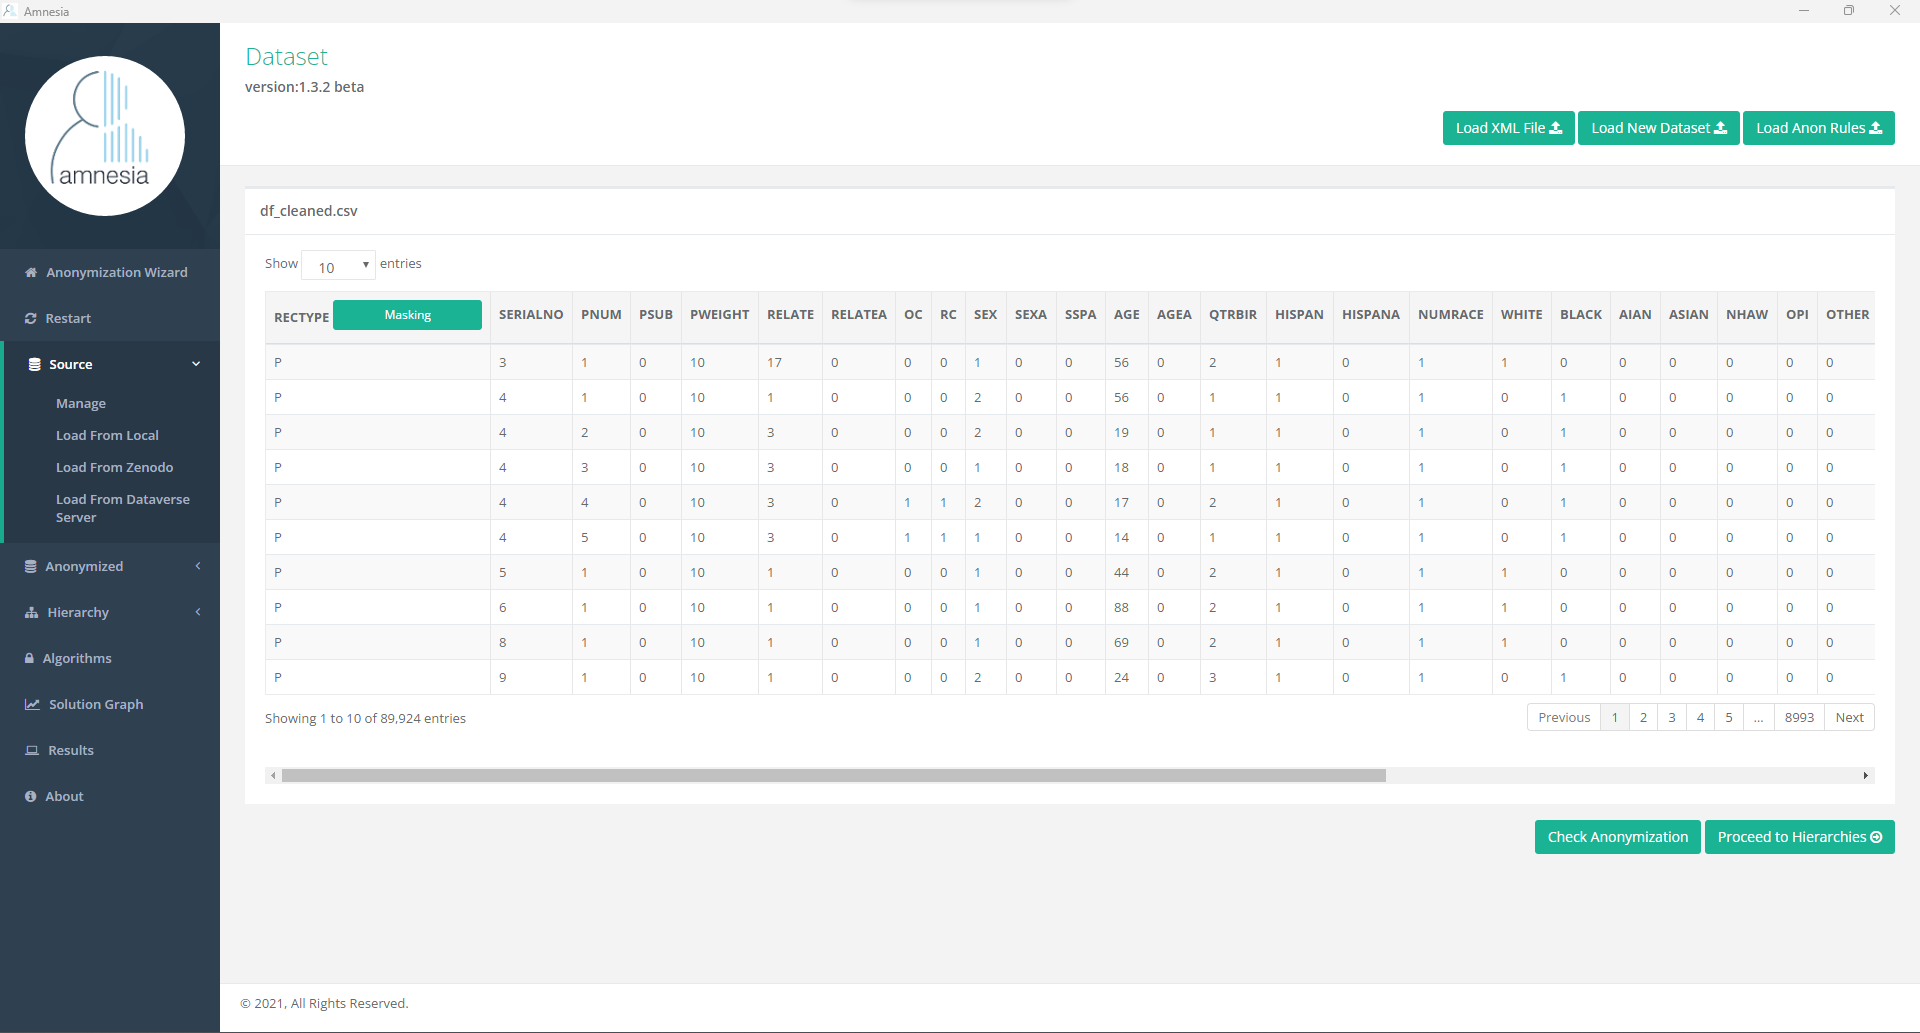

In [10]:
img.open(r"screenshots/amnesia_01.png")

* Step2: Create hierarchies

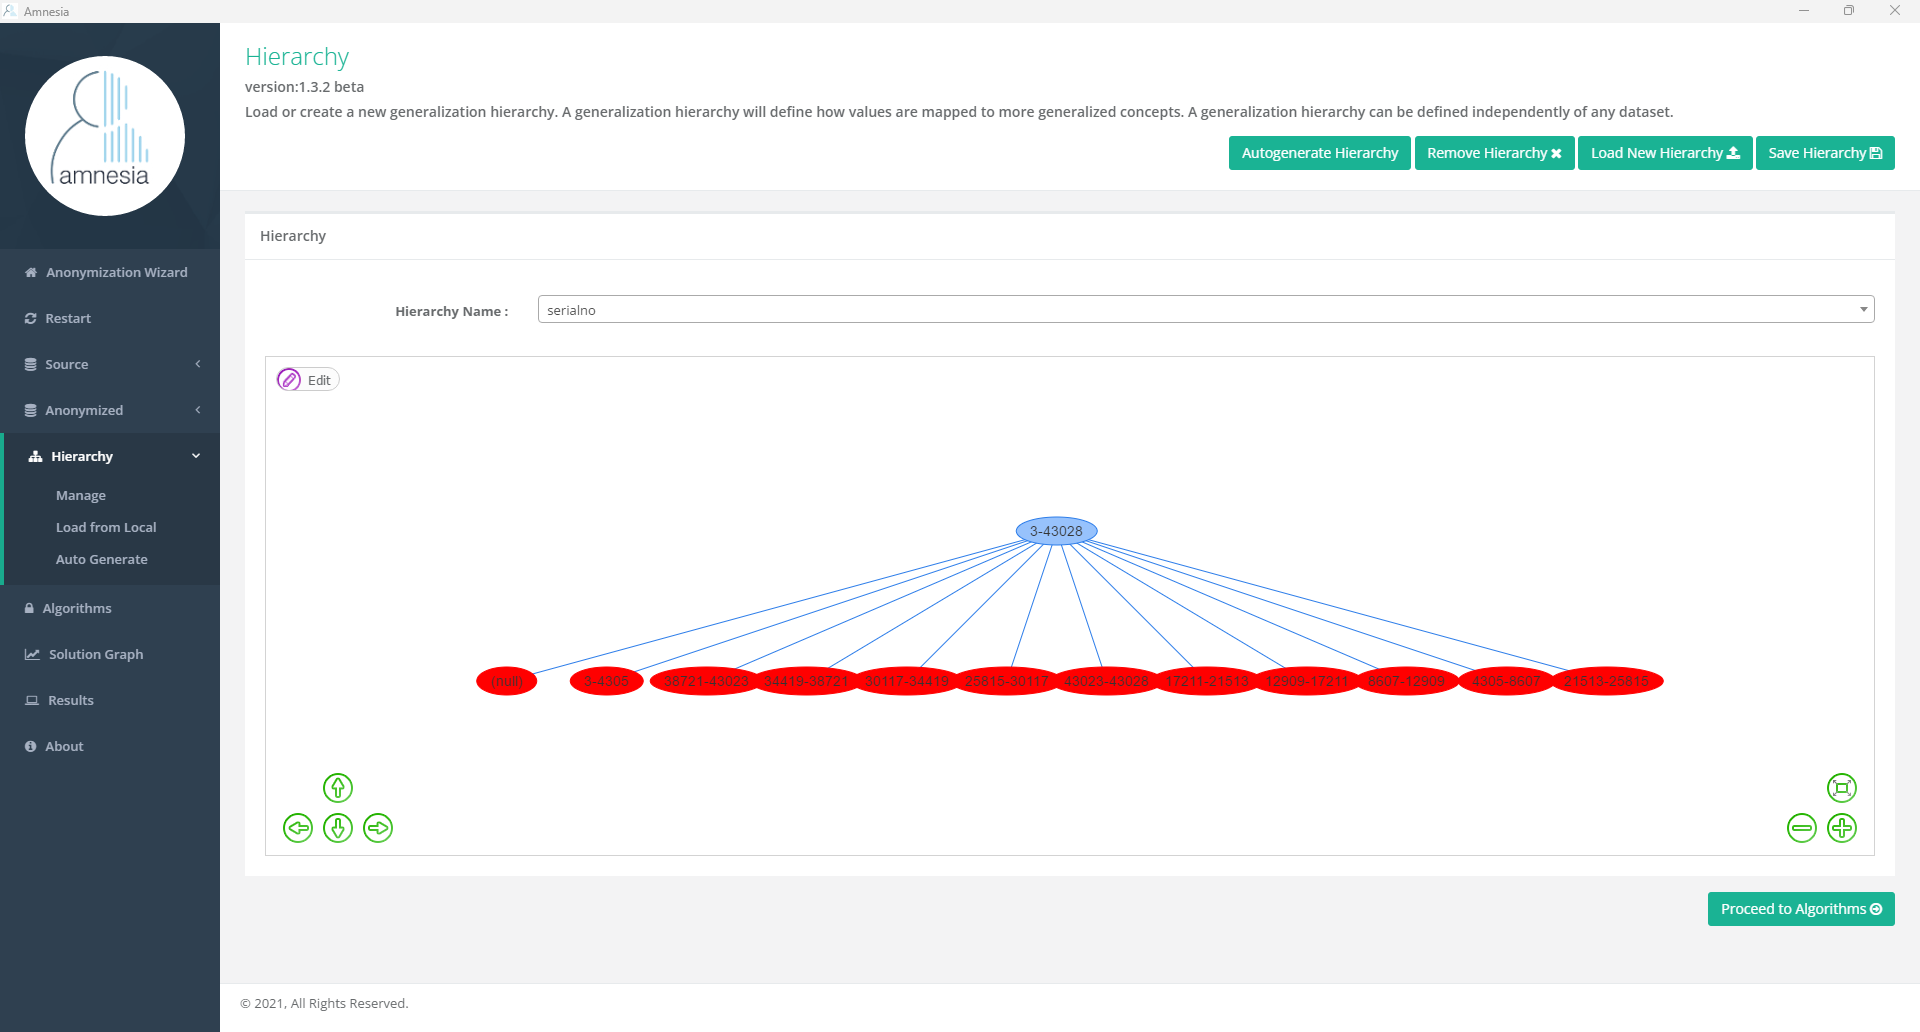

In [11]:
# serial no hierarchy
img.open(r"screenshots/amnesia_02-1.png")

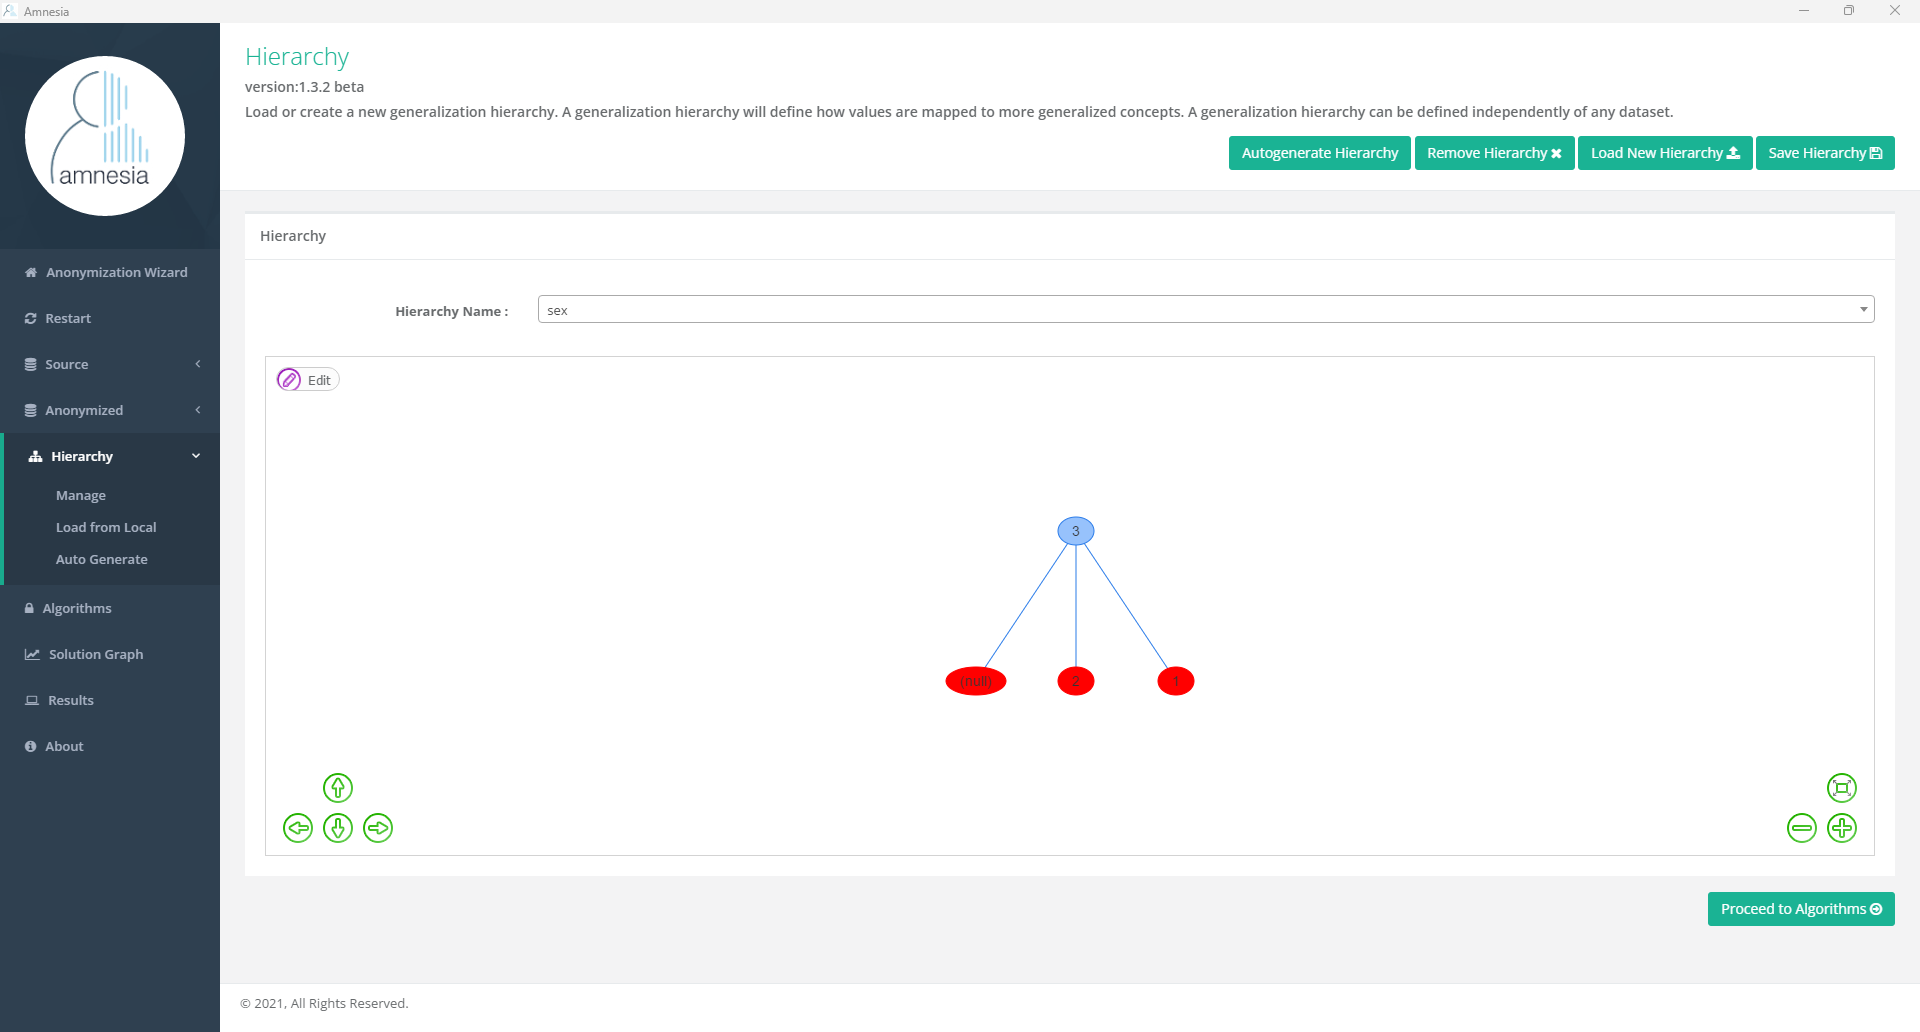

In [12]:
# sex hierarchy
img.open(r"screenshots/amnesia_02-2.png")

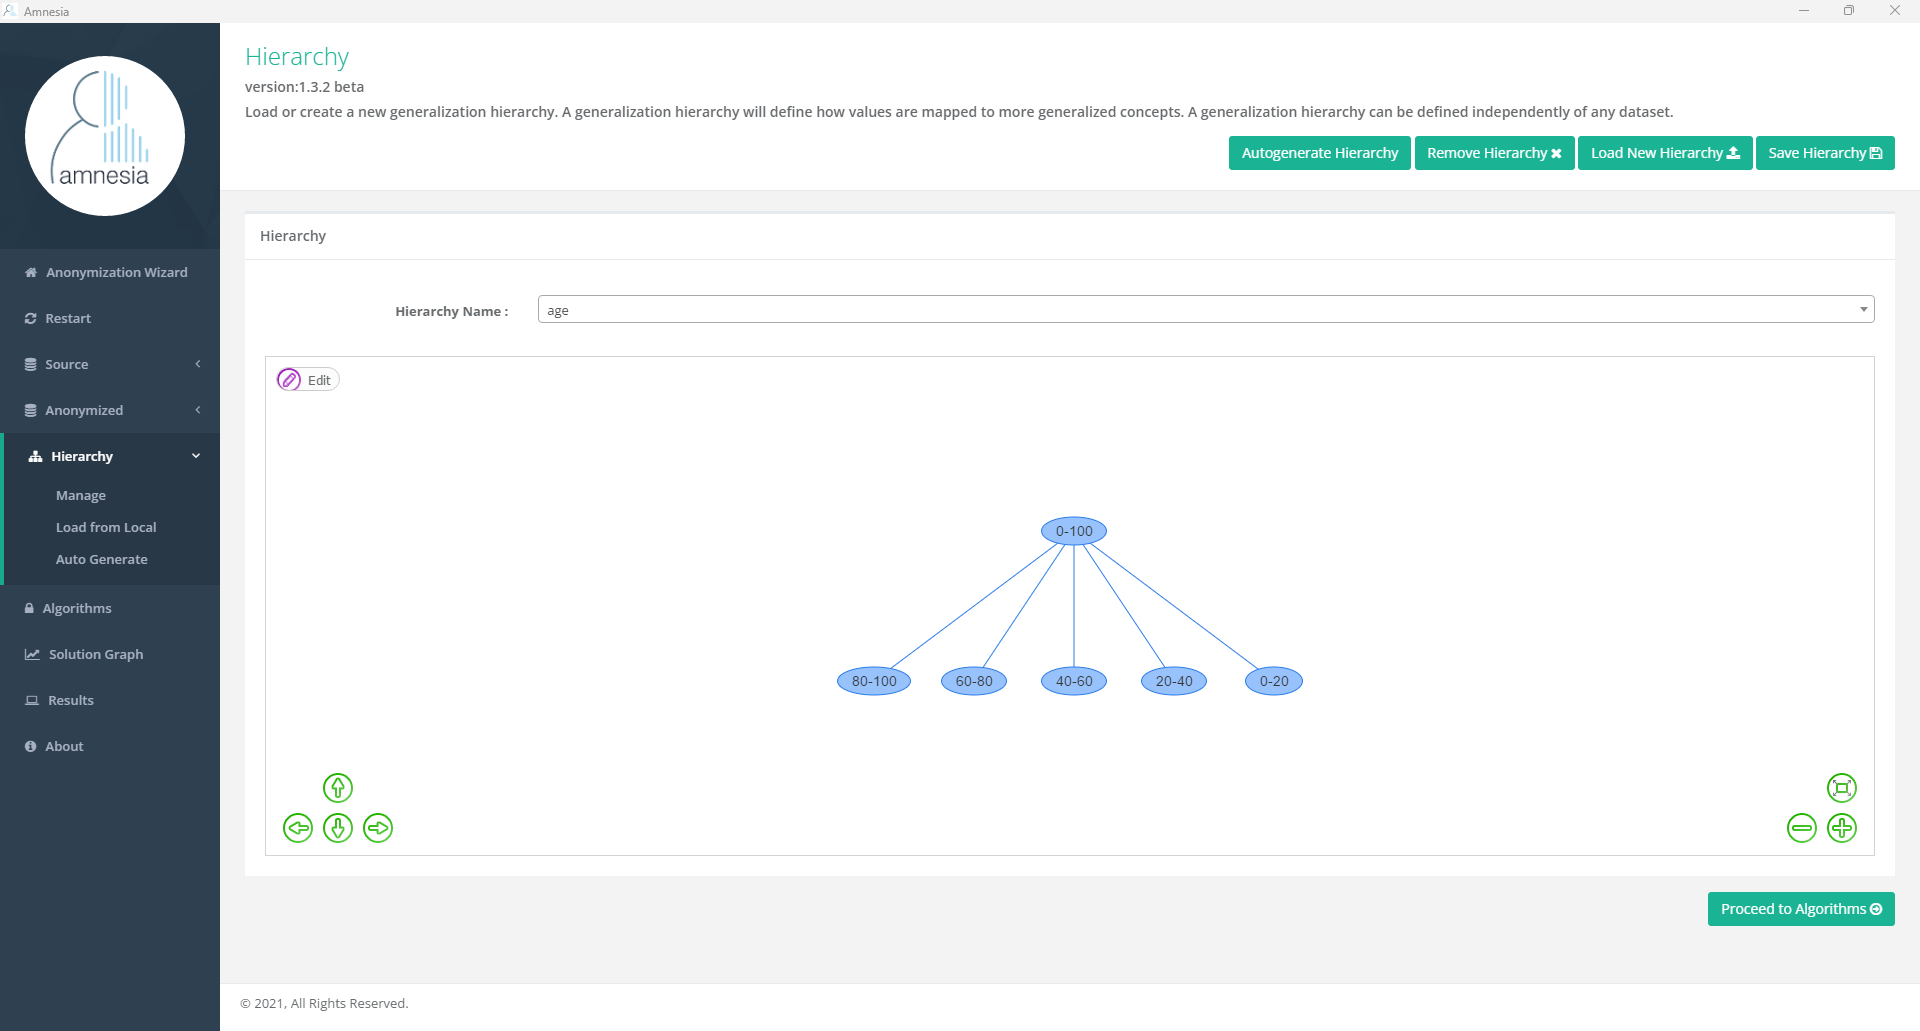

In [13]:
# age hierarchy
img.open(r"screenshots/amnesia_02-3.png")

* Step 3: Set k-anonymization algorithm with these 3 hierarchies and K = 10

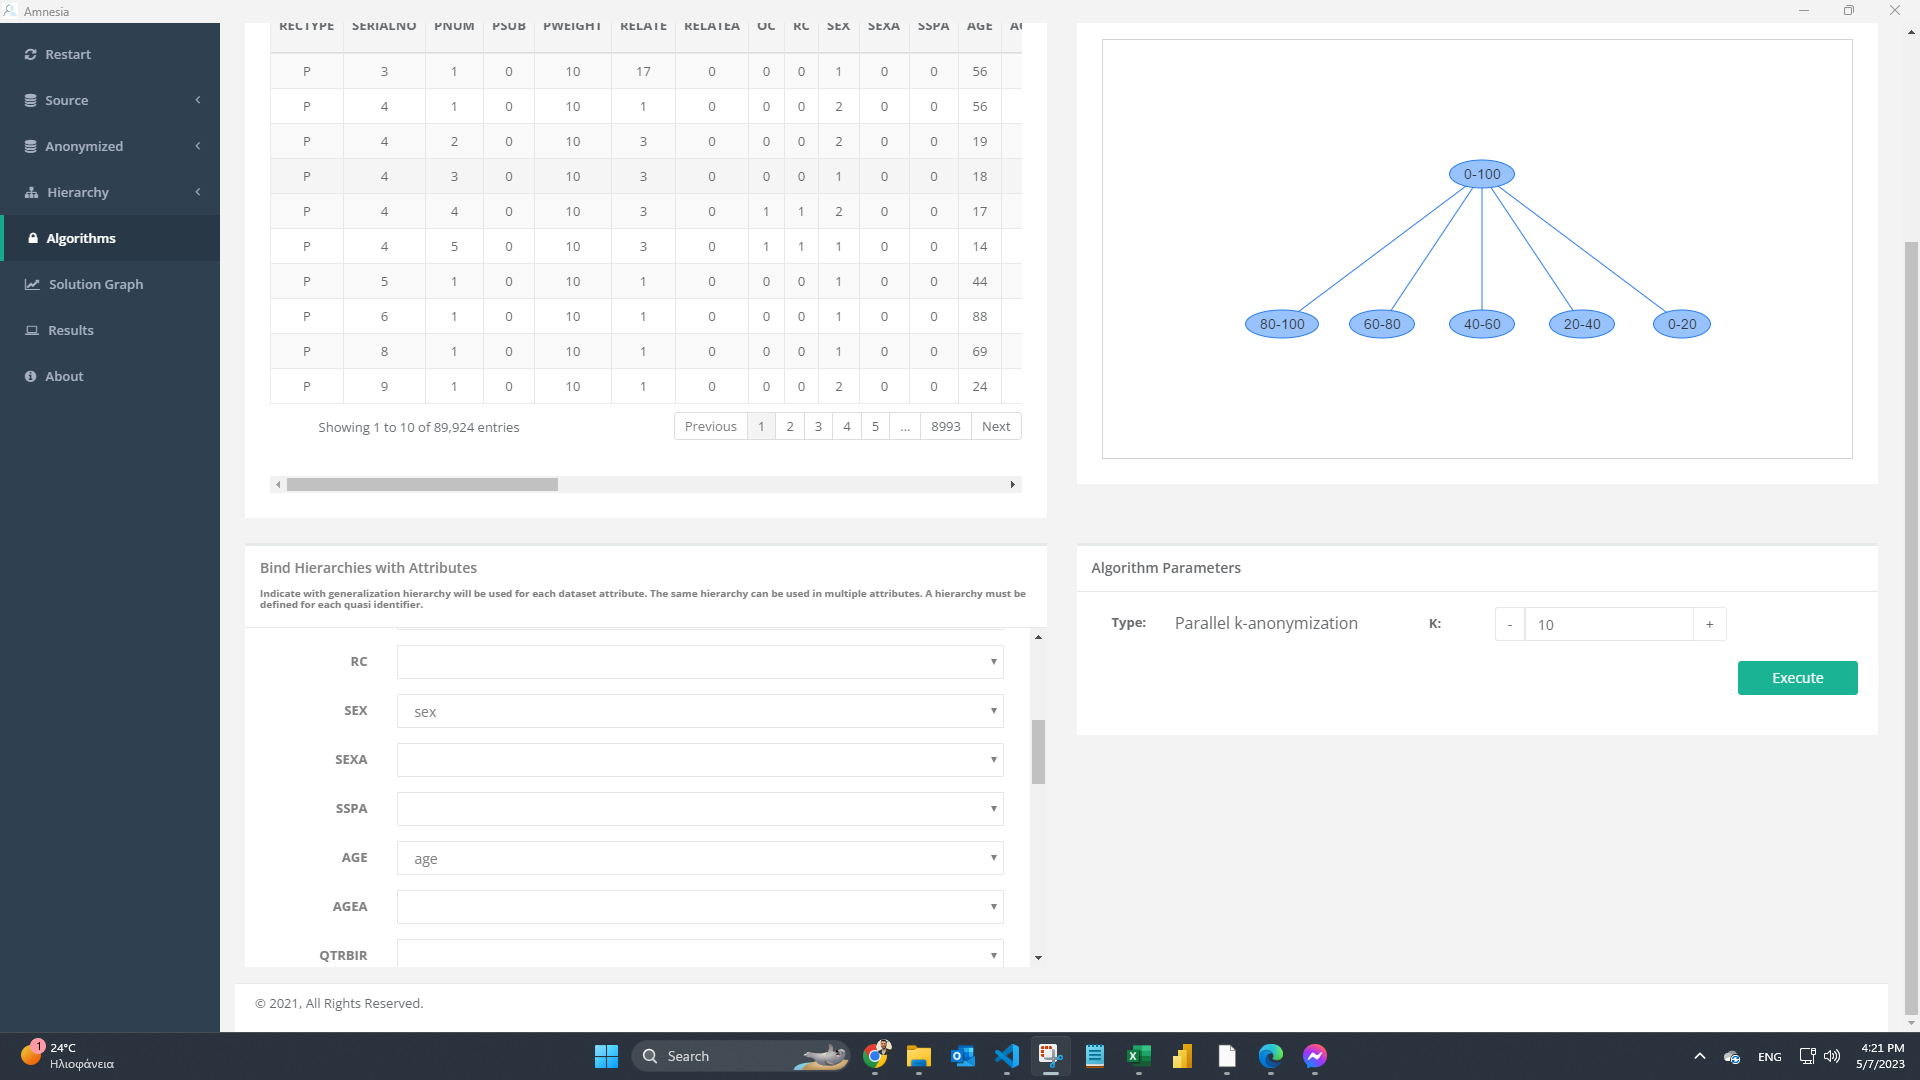

In [14]:
img.open(r"screenshots/amnesia_03.png")

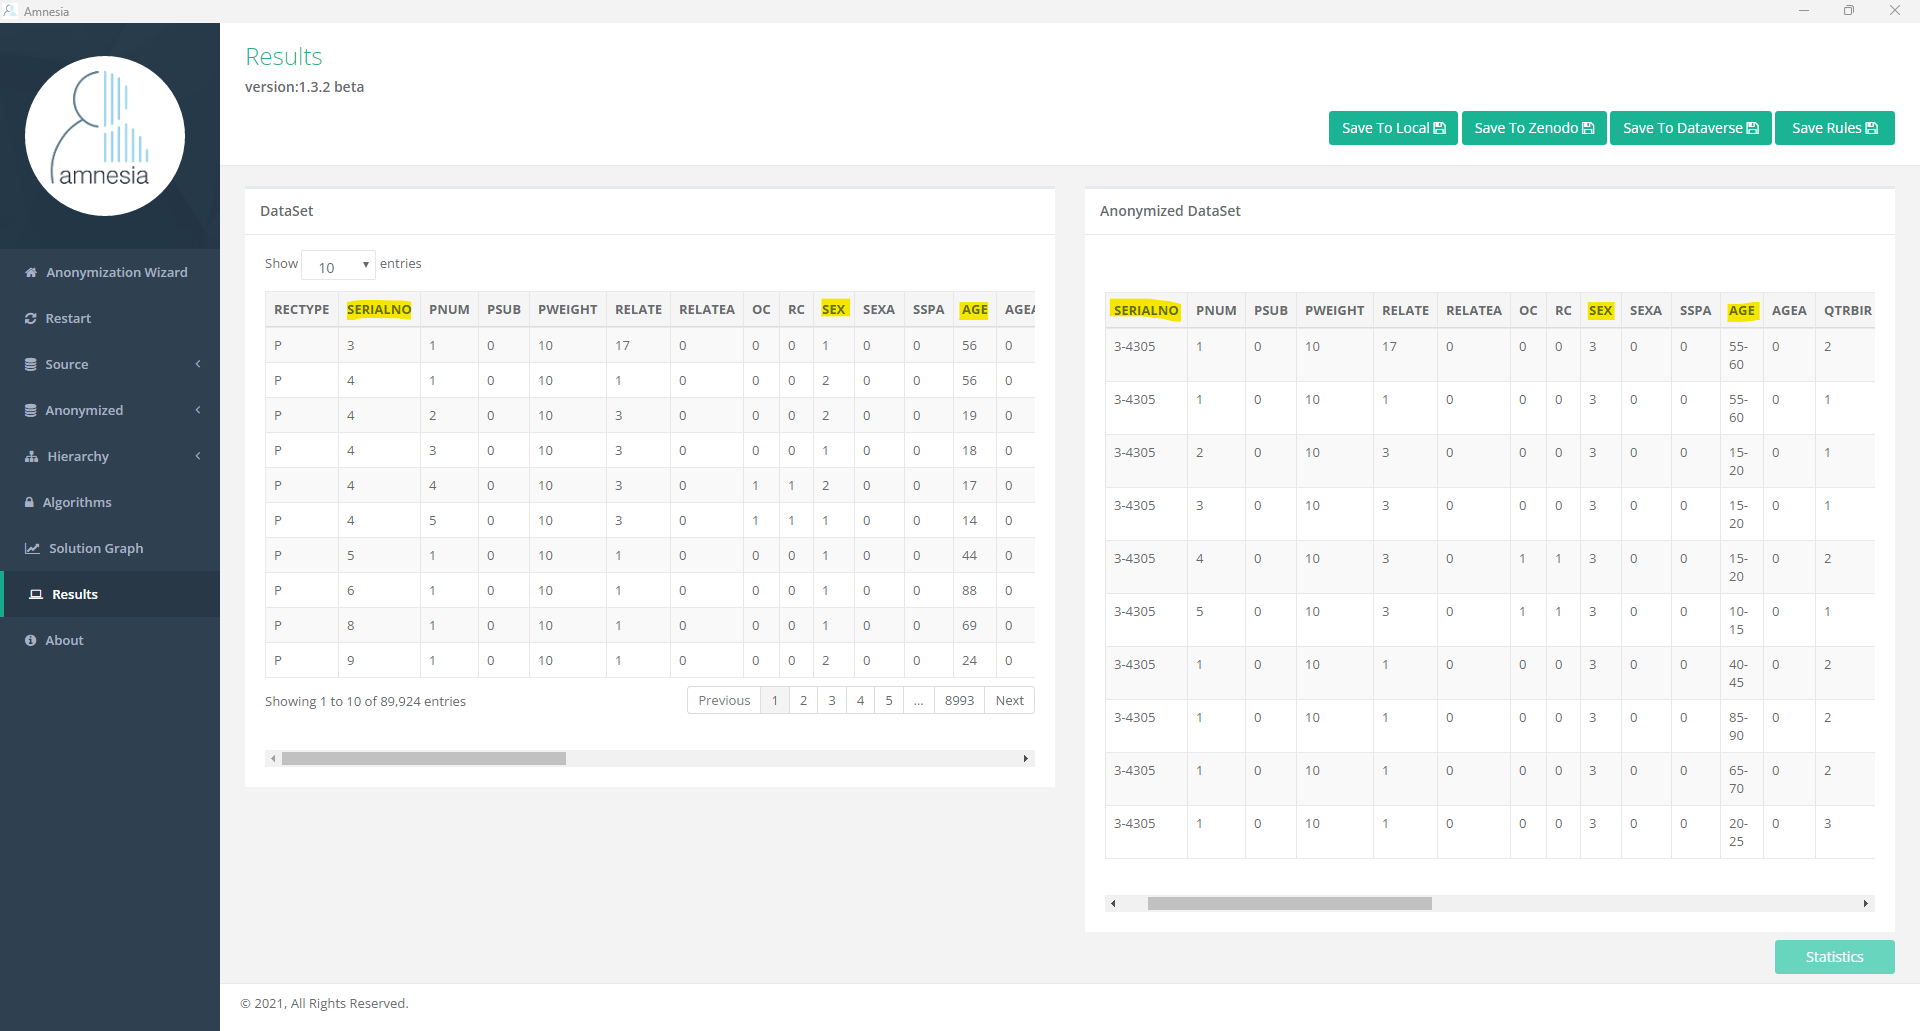

In [15]:
# Step 4: Examine new dataset
img.open(r"screenshots/amnesia_04.png")

#### 2. Plot the distribution of numeric features in the dataset using histograms.

In [16]:
# Convert all columns to numeric
df_plot = df_p_final.copy()
for col in df_plot.columns:
    df_plot[col] = pd.to_numeric(df_plot[col], errors='coerce')

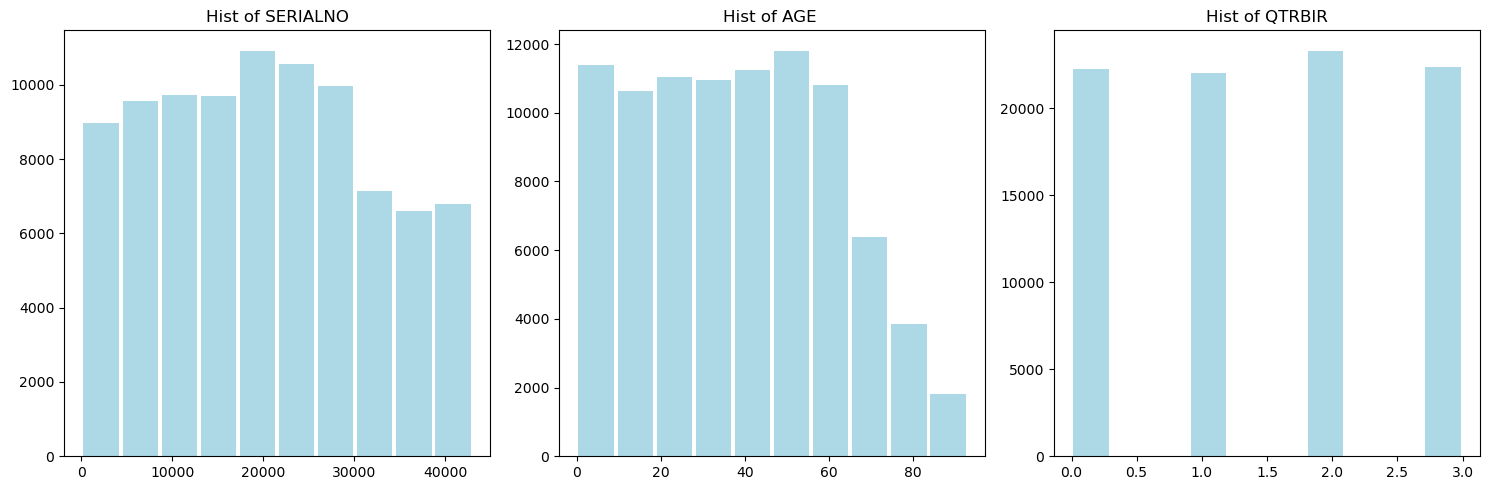

In [72]:
import matplotlib.pyplot as plt
import numpy as np

# Select only numeric columns
numeric_cols = df_plot[['SERIALNO', 'AGE ', 'QTRBIR']].columns.tolist()

# Calculate the number of series and plots per series
plots_per_series = 3
num_plots = len(numeric_cols)

# Set font size and color
plt.rcParams.update({'font.size': 10})
hist_color = 'lightblue'

# Create subplots for each plot
fig, axs = plt.subplots(ncols=plots_per_series, figsize=(15,5))

# Create a plot for each numeric column
for i in range(num_plots):
    col = numeric_cols[i]
    plot_num = i % plots_per_series
    data = df_plot[col].dropna()
    axs[plot_num].hist(data, color=hist_color, rwidth=0.9)
    axs[plot_num].set_title(f'Hist of {col}')

plt.tight_layout()
plt.show()


#### 3. Apply a random noise mechanism to some of the numeric columns using the Gaussian mechanism. The noise should be added to the original values in a way that preserves differential privacy.

In [29]:
import numpy as np
from diffprivlib.mechanisms import Gaussian

# Identify the numeric columns to add noise to
df_noisy = df_p_final.copy()
df_noisy['AGE'] = df_p_final['AGE '].astype(int)

# Apply the Gaussian mechanism to each numeric column
epsilon = 1.0
delta = 1e-5
sensitivity = 0.5
random_state = 42

mechanism = Gaussian(epsilon = epsilon, delta = delta , sensitivity = sensitivity, random_state = random_state)

noisy_data = df_noisy['AGE'].apply(lambda x: mechanism.randomise(x) )

noisy_data

0        56.613988
1        59.718218
2        18.197867
3        22.019566
4        17.125188
           ...    
89919    27.729476
89920     1.285927
89921    28.594424
89922    27.740898
89923    21.400789
Name: AGE, Length: 89924, dtype: float64

#### 4. Calculate the differentially private averages for the individuals using the noisy data.

In [50]:
print(f"Mean of age in initial dataset: { round(df_p_final['AGE '].astype(int).mean(),3)}")
print(f"Mean of age in after adding noise: { round(noisy_data.mean().mean(),3)}")

Mean of age in initial dataset: 38.274
Mean of age in after adding noise: 38.281


#### 5. Plot the distribution of numeric features after the noise addition. Try different values of the e parameter. Comment on the effect of the differential privacy on the results. 

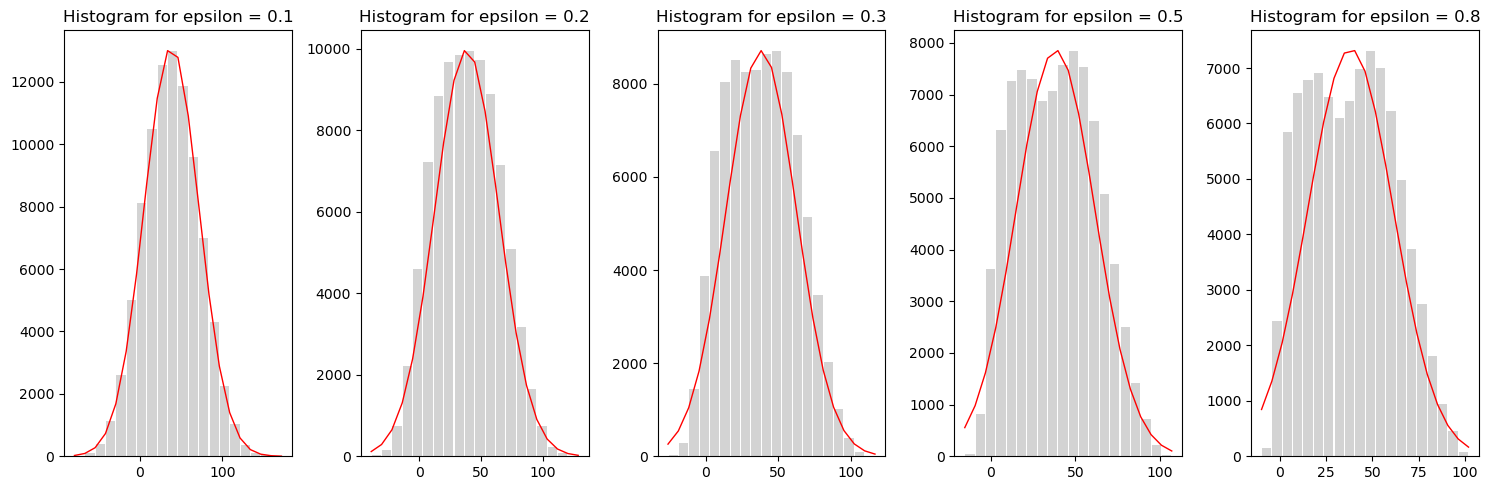

In [71]:
import matplotlib.pyplot as plt
from scipy.stats import norm

epsilon = [0.1, 0.2, 0.3, 0.5, 0.8]

# Create subplots for each histogram
fig, axs = plt.subplots(nrows=1, ncols=len(epsilon), figsize=(15,5))

for i, e in enumerate(epsilon):
    # Apply differential privacy mechanism to the data
    mechanism = Gaussian(epsilon=e, delta=delta, sensitivity=sensitivity, random_state=random_state)
    temp = df_noisy['AGE'].apply(lambda x: mechanism.randomise(x))
    
    # Plot the histogram for the current epsilon value
    n, bins, patches = axs[i].hist(temp, bins=20, color='lightgrey', rwidth=0.9)
    axs[i].set_title(f"Histogram for epsilon = {e}")
    
    # Compute the PDF of the normal distribution with the same mean and standard deviation as the data
    mu, std = norm.fit(temp)
    pdf = norm.pdf(bins, mu, std)
    
    # Scale the PDF to the same height as the histogram and plot it
    pdf *= n.max() / pdf.max()
    axs[i].plot(bins, pdf, 'r-', linewidth=1)
    
plt.tight_layout()
plt.show()


* It appears that as the value of epsilon approaches zero, the resulting distribution becomes more normal, whereas as it approaches 1, the distribution becomes increasingly skewed towards the left.